In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.dates as mtd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve,accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from numpy import mean
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


* Export Systematic sample dataset into my local machine , cleaned and loaded in to drive
* Challenges faced : df.to_csv is saving file to the virtual machine and not my local machine. so found from google.colab import files
files.download("data.csv")
* Collab UI changes done to export:
click on the folder icon on the left pane (3rd icon)
click 'Refresh'
right click the file, then download

In [ ]:
flightsampledata = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/Systematic_sampling_10%_Flight_dataset1_new.csv')
flightsampledata

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER,MKT_CARRIER_FL_NUM,SCH_OP_UNIQUE_CARRIER,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER,SCH_OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,DUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1089,NaN,NaN,NaN,NaN,DL,19790,DL,N326NB,1089,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1153,1151.0,-2.0,0.0,0.0,-1.0,1100-1159,28.0,1219.0,1525.0,11.0,1523,1536.0,13.0,13.0,0.0,0.0,1500-1559,0.0,NaN,0.0,N,150.0,165.0,126.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1097,NaN,NaN,NaN,NaN,DL,19790,DL,N356NW,1097,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,948,939.0,-9.0,0.0,0.0,-1.0,0900-0959,31.0,1010.0,1312.0,15.0,1333,1327.0,-6.0,0.0,0.0,-1.0,1300-1359,0.0,NaN,0.0,N,165.0,168.0,122.0,1.0,989.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1112,NaN,NaN,NaN,NaN,DL,19790,DL,N878DN,1112,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1010,1006.0,-4.0,0.0,0.0,-1.0,1000-1059,16.0,1022.0,1242.0,8.0,1314,1250.0,-24.0,0.0,0.0,-2.0,1300-1359,0.0,NaN,0.0,N,124.0,104.0,80.0,1.0,689.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1126,NaN,NaN,NaN,NaN,DL,19790,DL,N3732J,1126,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14730,1473004,33044,SDF,"Louisville, KY",KY,21,Kentucky,52,1313,1310.0,-3.0,0.0,0.0,-1.0,1300-1359,14.0,1324.0,1418.0,6.0,1426,1424.0,-2.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,N,73.0,74.0,54.0,1.0,321.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1140,NaN,NaN,NaN,NaN,DL,19790,DL,N819DN,1140,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,605,559.0,-6.0,0.0,0.0,-1.0,0600-0659,26.0,625.0,755.0,3.0,823,758.0,-25.0,0.0,0.0,-2.0,0800-0859,0.0,NaN,0.0,N,138.0,119.0,90.0,1.0,594.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,2021,2,5,2,7,2021-05-02,UA,UA_CODESHARE,19977,UA,3768,NaN,NaN,NaN,NaN,ZW,20046,ZW,N460AW,3768,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,10434,1043405,30434,AVP,"Scranton/Wilkes-Barre, PA",PA,42,Pennsylvania,23,1040,1032.0,-8.0,0.0,0.0,-1.0,1000-1059,16.0,1048.0,1131.0,4.0,1146,1135.0,-11.0,0.0,0.0,-1.0,1100-1159,0.0,NaN,0.0,N,66.0,63.0,43.0,1.0,189.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215610,2021,2,5,2,7,2021-05-02,UA,UA_CODESHARE,19977,UA,3758,NaN,NaN,NaN,NaN,ZW,20046,ZW,N467AW,3758,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11977,1197705,31977,GRB,"Green Bay, WI",WI,55,Wisconsin,45,1409,1401.0,-8.0,0.0,0.0,-1.0,1400-1459,14.0,1415.0,1446.0,6.0,1510,1452.0,-18.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,N,61.0,51.0,31.0,1

In [ ]:
flightsampledata.dropna(subset=['DEP_DEL15','TAXI_OUT','AIR_TIME'],inplace=True)

In [ ]:
flightsampledata.isna().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
                        ...  
SECURITY_DELAY         189874
LATE_AIRCRAFT_DELAY    189874
FIRST_DEP_TIME         213921
TOTAL_ADD_GTIME        213921
LONGEST_ADD_GTIME      213921
Length: 74, dtype: int64

In [ ]:
#corr = flightsampledata.corr()#Lists all pairs of highly collinear variables
#indices = np.where(corr > 0.8)
#indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
#                                        if x != y and x < y]
#indices

In [ ]:
'''import datetime
import calendar

def week_of_month(tgtdate):
    tgtdate = tgtdate.to_datetime()

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we canuse the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1

consolidatedSelectedColumns['calendar_wom'] = consolidatedSelectedColumns['DAY_OF_WEEK'].apply(week_of_month)'''

"import datetime\nimport calendar\n\ndef week_of_month(tgtdate):\n    tgtdate = tgtdate.to_datetime()\n\n    days_this_month = calendar.mdays[tgtdate.month]\n    for i in range(1, days_this_month):\n        d = datetime.datetime(tgtdate.year, tgtdate.month, i)\n        if d.day - d.weekday() > 0:\n            startdate = d\n            break\n    # now we canuse the modulo 7 appraoch\n    return (tgtdate - startdate).days //7 + 1\n\nconsolidatedSelectedColumns['calendar_wom'] = consolidatedSelectedColumns['DAY_OF_WEEK'].apply(week_of_month)"

# Approach 1

In [ ]:
systematic_sample_selectedcols=flightsampledata[['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','FL_DATE','ORIGIN','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','TAIL_NUM','AIR_TIME','OP_CARRIER_FL_NUM','DISTANCE','OP_CARRIER_AIRLINE_ID','DEP_DEL15','CRS_DEP_TIME','CRS_ELAPSED_TIME','TAXI_OUT','DEP_TIME']]

In [ ]:
systematic_sample_selectedcols.dtypes

YEAR                       int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
FL_DATE                   object
ORIGIN                    object
ORIGIN_AIRPORT_ID          int64
DEST_AIRPORT_ID            int64
TAIL_NUM                  object
AIR_TIME                 float64
OP_CARRIER_FL_NUM          int64
DISTANCE                 float64
OP_CARRIER_AIRLINE_ID      int64
DEP_DEL15                float64
CRS_DEP_TIME               int64
CRS_ELAPSED_TIME         float64
TAXI_OUT                 float64
DEP_TIME                 float64
dtype: object

In [ ]:
from datetime import date
systematic_sample_selectedcols['FL_DATE']=pd.to_datetime(systematic_sample_selectedcols['FL_DATE'],format='%Y-%m-%d')

In [ ]:
#systematic_sample_selectedcols['ORIGIN_AIRPORT_ID']=systematic_sample_selectedcols['DAY_OF_MONTH'].astype(int)
#systematic_sample_selectedcols['DEST_AIRPORT_ID']=systematic_sample_selectedcols['MONTH'].astype(int)
#systematic_sample_selectedcols['YEAR']=systematic_sample_selectedcols['YEAR'].astype(int)
systematic_sample_selectedcols.dtypes

YEAR                              int64
MONTH                             int64
DAY_OF_MONTH                      int64
DAY_OF_WEEK                       int64
FL_DATE                  datetime64[ns]
ORIGIN                           object
ORIGIN_AIRPORT_ID                 int64
DEST_AIRPORT_ID                   int64
TAIL_NUM                         object
AIR_TIME                        float64
OP_CARRIER_FL_NUM                 int64
DISTANCE                        float64
OP_CARRIER_AIRLINE_ID             int64
DEP_DEL15                       float64
CRS_DEP_TIME                      int64
CRS_ELAPSED_TIME                float64
TAXI_OUT                        float64
DEP_TIME                        float64
dtype: object

## Creating new column- WEEK_OF_MONTH

* challenges faced- Python datetime isocalendar giving wrong tuple
a = datetime.datetime(2021, 1, 1)
print(a.isocalendar())
and the output is supposed to be (year,weeknum,week day)
but got (2021, 53, 7),
* REASON BEHIND-->
 * The ISO year consists of 52 or 53 full weeks, and where a week starts on a Monday and ends on a Sunday. The first week of an ISO year is the first (Gregorian) calendar week of a year containing a Thursday. This is called week number 1, and the ISO year of that Thursday is the same as its Gregorian year.

 * For example, 2004 begins on a Thursday, so the first week of ISO year 2004 begins on Monday, 29 Dec 2003 and ends on Sunday, 4 Jan 2004, so that date(2003, 12, 29).isocalendar() == (2004, 1, 1) and date(2004, 1, 4).isocalendar() == (2004, 1, 7).




In [ ]:
'''import datetime
from datetime import  date

#def week_number_of_month(date):
 #    return (date.isocalendar()[1] - date.replace(day=1).isocalendar()[1] + 1)
 
#date_given = datetime.datetime.today().date()
#print("\nWeek number of month: ", week_number_of_month(date_given), "\n")
#for i in range(len(systematic_sample_selectedcols)):
#date_given = datetime.datetime(systematic_sample_selectedcols.FL_DATE).date()
#for i in range(len(systematic_sample_selectedcols.FL_DATE)):
date1=systematic_sample_selectedcols['FL_DATE']
for dt1 in date1:
  dt1= datetime.datetime(dt1.year,dt1.month,dt1.day).date()
  print(dt1)
  date1=((dt1.replace(day=1).isocalendar()[1]) + 1)
  #date=week_number_of_month(date)
  print(date1)
  #systematic_sample_selectedcols['WEEK_OF_MONTH']=systematic_sample_selectedcols['FL_DATE'].apply.date
#systematic_sample_selectedcols.head()
#date_given = datetime.datetime(year=2012, month=2, day=12).date()
#print("\nWeek number of month: ", week_number_of_month(date_given), "\n")'''

'import datetime\nfrom datetime import  date\n\n#def week_number_of_month(date):\n #    return (date.isocalendar()[1] - date.replace(day=1).isocalendar()[1] + 1)\n \n#date_given = datetime.datetime.today().date()\n#print("\nWeek number of month: ", week_number_of_month(date_given), "\n")\n#for i in range(len(systematic_sample_selectedcols)):\n#date_given = datetime.datetime(systematic_sample_selectedcols.FL_DATE).date()\n#for i in range(len(systematic_sample_selectedcols.FL_DATE)):\ndate1=systematic_sample_selectedcols[\'FL_DATE\']\nfor dt1 in date1:\n  dt1= datetime.datetime(dt1.year,dt1.month,dt1.day).date()\n  print(dt1)\n  date1=((dt1.replace(day=1).isocalendar()[1]) + 1)\n  #date=week_number_of_month(date)\n  print(date1)\n  #systematic_sample_selectedcols[\'WEEK_OF_MONTH\']=systematic_sample_selectedcols[\'FL_DATE\'].apply.date\n#systematic_sample_selectedcols.head()\n#date_given = datetime.datetime(year=2012, month=2, day=12).date()\n#print("\nWeek number of month: ", week_numbe

In [ ]:
'''def week_number_of_month(date_value):
  return(date_value.replace(day=1).isocalendar()[1]) 
    #return (date_value.isocalendar()[1]-date_value.replace(day=1).isocalendar()[1]+1)
 
date_given = datetime.datetime(year=2021, month=1, day=1).date()
print(date_given)
print("\nWeek number of month: ", week_number_of_month(date_given), "\n")'''

'def week_number_of_month(date_value):\n  return(date_value.replace(day=1).isocalendar()[1]) \n    #return (date_value.isocalendar()[1]-date_value.replace(day=1).isocalendar()[1]+1)\n \ndate_given = datetime.datetime(year=2021, month=1, day=1).date()\nprint(date_given)\nprint("\nWeek number of month: ", week_number_of_month(date_given), "\n")'

* The above isocalendar() dosent works well to retrive week of month(). 
so to find start day of week in month tried with(d.day - d.weekday()) 
* Then to group in to 7 days per week (tgtdate - startdate).days //7) is used

In [ ]:
import datetime
import calendar

def week_of_month(tgtdate):
    #tgtdate = tgtdate.to_datetime()

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we can use the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 2

systematic_sample_selectedcols['WEEK_OF_MONTH'] = systematic_sample_selectedcols['FL_DATE'].apply(week_of_month)
systematic_sample_selectedcols[['FL_DATE','WEEK_OF_MONTH']].sort_values('WEEK_OF_MONTH',ascending=False) .head()

,FL_DATE,WEEK_OF_MONTH
73763,2021-03-29,6
190172,2021-05-31,6
86852,2021-03-30,6
86851,2021-03-30,6
86850,2021-03-30,6


In [ ]:
systematic_sample_selectedcols['WEEK_OF_MONTH'].value_counts()

4    49502
3    49402
2    48483
5    47621
1    13755
6     6366
Name: WEEK_OF_MONTH, dtype: int64

## Creating New column--> Week days==0, Weekends == 1(DAY_OF_WEEK_days_end)

In [ ]:
#'DAY_OF_WEEK' because delay could depend on traffic in specific days: classify it to weekend or working day
def get_day_category(day_of_week):
    if day_of_week <= 5:
        return 0 #'working day'
    elif day_of_week > 5:
        return 1 #'weekend'
systematic_sample_selectedcols['DAY_OF_WEEK_days_end'] = systematic_sample_selectedcols['DAY_OF_WEEK']
   
systematic_sample_selectedcols['DAY_OF_WEEK_days_end'] = systematic_sample_selectedcols.DAY_OF_WEEK_days_end.apply(get_day_category)
systematic_sample_selectedcols

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,OP_CARRIER_AIRLINE_ID,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end
0,2021,1,17,7,2021-01-17,DFW,11298,11433,N326NB,126.0,1089,986.0,19790,0.0,1153,150.0,28.0,1151.0,3,1
1,2021,1,17,7,2021-01-17,SLC,14869,11298,N356NW,122.0,1097,989.0,19790,0.0,948,165.0,31.0,939.0,3,1
2,2021,1,17,7,2021-01-17,SEA,14747,14869,N878DN,80.0,1112,689.0,19790,0.0,1010,124.0,16.0,1006.0,3,1
3,2021,1,17,7,2021-01-17,ATL,10397,14730,N3732J,54.0,1126,321.0,19790,0.0,1313,73.0,14.0,1310.0,3,1
4,2021,1,17,7,2021-01-17,DTW,11433,10397,N819DN,90.0,1140,594.0,19790,0.0,605,138.0,26.0,559.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,2021,5,2,7,2021-05-02,IAD,12264,10434,N460AW,43.0,3768,189.0,20046,0.0,1040,66.0,16.0,1032.0,1,1
215610,2021,5,2,7,2021-05-02,ORD,13930,11977,N467AW,31.0,3758,174.0,20046,0.0,1409,61.0,14.0,1401.0,1,1
215611,2021,5,2,7,2021-05-02,IAD,12264,10874,N452AW,47.0,3746,251.0,20046,0.0,1740,83.0,19.0,1736.0,1,1
215612,2021,5,2,7,2021-05-02,DAY,11267,13930,N459AW,44.0,3736,240.0,20046,0.0,900,79.0,12.0,850.0,1,1


In [ ]:
systematic_sample_selectedcols['DAY_OF_WEEK_days_end'].value_counts()

0    152202
1     62927
Name: DAY_OF_WEEK_days_end, dtype: int64

In [ ]:
systematic_sample_selectedcols1=systematic_sample_selectedcols.drop(columns=['FL_DATE','TAIL_NUM','YEAR'],axis=1)

In [ ]:
systematic_sample_selectedcols1.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'ORIGIN_AIRPORT_ID',
       'DEST_AIRPORT_ID', 'AIR_TIME', 'OP_CARRIER_FL_NUM', 'DISTANCE',
       'OP_CARRIER_AIRLINE_ID', 'DEP_DEL15', 'CRS_DEP_TIME',
       'CRS_ELAPSED_TIME', 'TAXI_OUT', 'DEP_TIME', 'WEEK_OF_MONTH',
       'DAY_OF_WEEK_days_end'],
      dtype='object')

## Onehot encoding --ORIGIN

In [ ]:
systematic_sample_selectedcols_dummies = pd.get_dummies(systematic_sample_selectedcols1, drop_first=True)
systematic_sample_selectedcols_dummies.dtypes

MONTH                int64
DAY_OF_MONTH         int64
DAY_OF_WEEK          int64
ORIGIN_AIRPORT_ID    int64
DEST_AIRPORT_ID      int64
                     ...  
ORIGIN_XNA           uint8
ORIGIN_XWA           uint8
ORIGIN_YAK           uint8
ORIGIN_YKM           uint8
ORIGIN_YUM           uint8
Length: 388, dtype: object

In [ ]:
systematic_samplefinal=systematic_sample_selectedcols_dummies.copy()

In [ ]:
y = systematic_samplefinal.DEP_DEL15 
 #Drop target and set the dependent values variables 
X = systematic_samplefinal.drop('DEP_DEL15', axis=1)
print(X.shape,y.shape)

(215129, 387) (215129,)


## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from numpy import mean
model_LOGISTICS = LogisticRegression(class_weight='balanced', solver='saga',penalty='l1')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt1 = make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample1 = cross_val_score(pipeline_LRsmt1,X , y, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_LR_OSample1))

Mean ROC AUC: 0.619


## Lists all pairs of highly correlated variables

In [ ]:
corr = X.corr()
indices = np.where(corr > 0.8)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('DAY_OF_MONTH', 'WEEK_OF_MONTH'),
 ('AIR_TIME', 'DISTANCE'),
 ('AIR_TIME', 'CRS_ELAPSED_TIME'),
 ('DISTANCE', 'CRS_ELAPSED_TIME'),
 ('CRS_DEP_TIME', 'DEP_TIME')]

In [ ]:
X1=X.copy()

### Dropping Highly correlated columns

In [ ]:
X1.drop(columns=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DISTANCE','DAY_OF_MONTH','AIR_TIME'],inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from numpy import mean
model_LOGISTICS = LogisticRegression(class_weight='balanced', solver='saga',penalty='l1')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt1 = make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample1_1 = cross_val_score(pipeline_LRsmt1,X1,y, scoring='roc_auc', cv=kf, n_jobs=-1)
A1_LR_accuracy=mean(y_pred_LR_OSample1_1)
print(A1_LR_accuracy)
print('Mean ROC AUC: %.3f' % A1_LR_accuracy)


0.619166324242926
Mean ROC AUC: 0.619


after dropping highly correlated features, accuracy -->61%

## RandomForest Feature importance

In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
model_Randomforest_smt.fit(X1,y)
importance=model_Randomforest_smt.feature_importances_
df=pd.DataFrame({'features':pd.DataFrame(X1).columns,'importance':importance})
print(df)
#df.set_index('importance')
#df=df.sort_values('importance')
#importance.k_feature_names_
#df.plot.bar(color='blue')

                  features  importance
0                    MONTH    0.042871
1              DAY_OF_WEEK    0.038082
2        OP_CARRIER_FL_NUM    0.099167
3    OP_CARRIER_AIRLINE_ID    0.049300
4             CRS_DEP_TIME    0.162440
..                     ...         ...
377             ORIGIN_XNA    0.000473
378             ORIGIN_XWA    0.000076
379             ORIGIN_YAK    0.000051
380             ORIGIN_YKM    0.000038
381             ORIGIN_YUM    0.000151

[382 rows x 2 columns]


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
print(df.sort_values(by='importance',ascending=False))

              features  importance
7             DEP_TIME         0.2
4         CRS_DEP_TIME         0.2
2    OP_CARRIER_FL_NUM         0.1
5     CRS_ELAPSED_TIME         0.1
6             TAXI_OUT         0.1
..                 ...         ...
218         ORIGIN_LNY         0.0
376         ORIGIN_WYS         0.0
356         ORIGIN_SWO         0.0
241         ORIGIN_MKK         0.0
181         ORIGIN_ILG         0.0

[382 rows x 2 columns]


## RANDOM FOREST

In [ ]:

#Rscaler = RobustScaler()
oversample = SMOTE()
pipeline_RFsmt = make_pipeline(oversample,model_Randomforest_smt)
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample = cross_val_score(pipeline_RFsmt, X1, y, scoring='roc_auc', cv=kf, n_jobs=-1)

#y_pred_RF_OSample = cross_val_predict(pipeline_RFsmt,X, y, cv=kf)
#print(confusion_matrix(y, y_pred_RF_OSample))
#print(classification_report(y, y_pred_RF_OSample))
#print(confusion_matrix(y, scores_ypred))
#print(classification_report(y, scores_ypred))
# summarize performance


In [ ]:
A1_RF_Accuracy=mean(y_pred_RF_OSample)
print('Mean ROC AUC: %.3f' % A1_RF_Accuracy)

Mean ROC AUC: 0.770


### Approach1- Accuracy summary
* LR- 62%
* RF- 76%

# Approach 2

## Instead of Origin lets take add weightage wrt delay count in origin

In [ ]:
origin_del = systematic_sample_selectedcols[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False).reset_index()
origin_del.rename({'DEP_DEL15':'ORIGIN_DELAY_COUNT'},inplace=True, axis=1)
origin_del['ORIGIN_weight'] = pd.qcut(origin_del['ORIGIN_DELAY_COUNT'], 100, labels = False,duplicates='drop')
print(origin_del)
systematic_sample_selectedcols2 = systematic_sample_selectedcols.merge(origin_del, left_on='ORIGIN', right_on='ORIGIN')
systematic_sample_selectedcols2.drop(columns=['ORIGIN_DELAY_COUNT','ORIGIN'], inplace=True, axis=1)
systematic_sample_selectedcols2

    ORIGIN  ORIGIN_DELAY_COUNT  ORIGIN_weight
0      DFW              1696.0             58
1      DEN              1407.0             58
2      ATL              1297.0             58
3      ORD               779.0             58
4      MCO               754.0             57
..     ...                 ...            ...
368    OME                 0.0              0
369    SUX                 0.0              0
370    EKO                 0.0              0
371    SWO                 0.0              0
372    OWB                 0.0              0

[373 rows x 3 columns]


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,OP_CARRIER_AIRLINE_ID,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,ORIGIN_weight
0,2021,1,17,7,2021-01-17,11298,11433,N326NB,126.0,1089,986.0,19790,0.0,1153,150.0,28.0,1151.0,3,1,58
1,2021,1,17,7,2021-01-17,11298,10397,N329DN,85.0,1244,731.0,19790,0.0,1049,121.0,16.0,1044.0,3,1,58
2,2021,1,18,1,2021-01-18,11298,11433,N334NB,128.0,1184,986.0,19790,0.0,1625,151.0,14.0,1619.0,4,0,58
3,2021,1,18,1,2021-01-18,11298,11433,N127DU,124.0,1390,986.0,19790,0.0,1400,148.0,13.0,1407.0,4,0,58
4,2021,1,19,2,2021-01-19,11298,14869,N356NW,138.0,1038,989.0,19790,0.0,830,177.0,13.0,824.0,4,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215124,2021,5,24,1,2021-05-24,10154,10721,N178JB,25.0,1351,91.0,20409,0.0,1110,51.0,15.0,1102.0,5,0,2
215125,2021,5,30,7,2021-05-30,10154,11618,N554GJ,56.0,4445,218.0,20500,0.0,1220,100.0,16.0,1211.0,5,1,2
215126,2021,5,28,5,2021-05-28,10154,12264,N520GJ,80.0,4573,423.0,20500,0.0,1400,113.0,14.0,1350.0,5,0,2
215127,2021,5,30,7,2021-05-30,15897,14869,N429SW,44.0,4338,273.0,20304,0.0,1719,77.0,9.0,1707.0,5,1,0


In [ ]:
y_new = systematic_sample_selectedcols2.DEP_DEL15 
 #Drop target and set the dependent values variables 
X_new = systematic_sample_selectedcols2.drop('DEP_DEL15', axis=1)
print(X_new.shape,y_new.shape)

(215129, 19) (215129,)


## Dropping highly correlated features

In [ ]:
corr = X_new.corr()
indices = np.where(corr > 0.8)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('DAY_OF_MONTH', 'WEEK_OF_MONTH'),
 ('AIR_TIME', 'DISTANCE'),
 ('AIR_TIME', 'CRS_ELAPSED_TIME'),
 ('DISTANCE', 'CRS_ELAPSED_TIME'),
 ('CRS_DEP_TIME', 'DEP_TIME')]

In [ ]:
X_new.drop(columns=['DEST_AIRPORT_ID','DISTANCE','DAY_OF_MONTH','AIR_TIME','YEAR','FL_DATE','TAIL_NUM'],inplace=True)

In [ ]:
X_new.isna().sum()

MONTH                    0
DAY_OF_WEEK              0
ORIGIN_AIRPORT_ID        0
OP_CARRIER_FL_NUM        0
OP_CARRIER_AIRLINE_ID    0
CRS_DEP_TIME             0
CRS_ELAPSED_TIME         0
TAXI_OUT                 0
DEP_TIME                 0
WEEK_OF_MONTH            0
DAY_OF_WEEK_days_end     0
ORIGIN_weight            0
dtype: int64

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LOGISTICS = LogisticRegression(class_weight='balanced', solver='saga',penalty='l1')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt2= make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample2 = cross_val_score(pipeline_LRsmt2, X_new, y_new, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_LR_OSample2))

Mean ROC AUC: 0.621


After taking ORIGIN_WEIGHTAGE accuracy increased to 62%

## Random forest feature importance

                 features  importance
0                   MONTH         0.0
1             DAY_OF_WEEK         0.0
2       ORIGIN_AIRPORT_ID         0.0
3       OP_CARRIER_FL_NUM         0.1
4   OP_CARRIER_AIRLINE_ID         0.0
5            CRS_DEP_TIME         0.3
6        CRS_ELAPSED_TIME         0.1
7                TAXI_OUT         0.1
8                DEP_TIME         0.3
9           WEEK_OF_MONTH         0.0
10   DAY_OF_WEEK_days_end         0.0
11          ORIGIN_weight         0.0


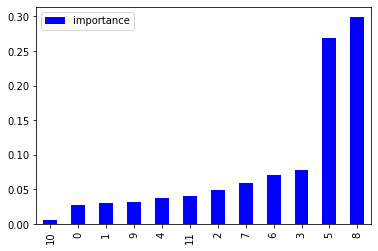

In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
model_Randomforest_smt.fit(X_new,y_new)
importance=model_Randomforest_smt.feature_importances_
df=pd.DataFrame({'features':pd.DataFrame(X_new).columns,'importance':importance})
print(df)
df.set_index('importance')
df=df.sort_values('importance')
#importance.k_feature_names_
df.plot.bar(color='blue')

Lets drop un important features

In [ ]:
X_new1=X_new.copy()

lets drop unimportant features

with droping and without dropping RF accuracy is same--54%

In [ ]:
#X_new1.drop(columns=['DAY_OF_WEEK_days_end','DAY_OF_WEEK'],inplace=True)

In [ ]:
X_new1.columns

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID', 'OP_CARRIER_FL_NUM',
       'OP_CARRIER_AIRLINE_ID', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'TAXI_OUT',
       'DEP_TIME', 'WEEK_OF_MONTH', 'DAY_OF_WEEK_days_end', 'ORIGIN_weight'],
      dtype='object')

## Random forest

In [ ]:
#model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
from numpy import mean
#Rscaler = RobustScaler()
pca = PCA(.95)
oversample = SMOTE()
pipeline_RFsmt = make_pipeline(oversample,pca,model_Randomforest_smt)
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample = cross_val_score(pipeline_RFsmt, X_new1, y_new, scoring='roc_auc', cv=kf, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(y_pred_RF_OSample))

Mean ROC AUC: 0.541


### Approach 2 Accuracy summary
* LR Model- 62%
* RANDOM FOREST-54%

# Approach 3

### Instead of origin weight(on approach2)- lets take origin delay count

In [ ]:
origin_del = systematic_sample_selectedcols[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False).reset_index()
origin_del.rename({'DEP_DEL15':'ORIGIN_DELAY_COUNT'},inplace=True, axis=1)

#origin_del['ORIGIN_weight'] = pd.qcut(origin_del['ORIGIN_DELAY_COUNT'], 100, labels = False,duplicates='drop')
print(origin_del)
systematic_sample_selectedcols3 = systematic_sample_selectedcols.merge(origin_del, left_on='ORIGIN', right_on='ORIGIN')

    ORIGIN  ORIGIN_DELAY_COUNT
0      DFW              1696.0
1      DEN              1407.0
2      ATL              1297.0
3      ORD               779.0
4      MCO               754.0
..     ...                 ...
368    OME                 0.0
369    SUX                 0.0
370    EKO                 0.0
371    SWO                 0.0
372    OWB                 0.0

[373 rows x 2 columns]


In [ ]:
systematic_sample_selectedcols3.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'ORIGIN',
       'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'TAIL_NUM', 'AIR_TIME',
       'OP_CARRIER_FL_NUM', 'DISTANCE', 'OP_CARRIER_AIRLINE_ID', 'DEP_DEL15',
       'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'TAXI_OUT', 'DEP_TIME',
       'WEEK_OF_MONTH', 'DAY_OF_WEEK_days_end', 'ORIGIN_DELAY_COUNT'],
      dtype='object')

lets drop highly correlared columns 

In [ ]:
corr = systematic_sample_selectedcols3.corr()
indices = np.where(corr > 0.8)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('DAY_OF_MONTH', 'WEEK_OF_MONTH'),
 ('AIR_TIME', 'DISTANCE'),
 ('AIR_TIME', 'CRS_ELAPSED_TIME'),
 ('DISTANCE', 'CRS_ELAPSED_TIME'),
 ('CRS_DEP_TIME', 'DEP_TIME')]

In [ ]:
systematic_sample_selectedcols3.drop(columns=['ORIGIN','DAY_OF_MONTH','AIR_TIME','DISTANCE','FL_DATE','YEAR','TAIL_NUM'], inplace=True, axis=1)

Logistic regression Model feature importance

In [ ]:
systematic_sample_selectedcols3_y = systematic_sample_selectedcols3.DEP_DEL15 
 #Drop target and set the dependent values variables 
systematic_sample_selectedcols3_x = systematic_sample_selectedcols3.drop('DEP_DEL15', axis=1)
print(systematic_sample_selectedcols3_x.shape,systematic_sample_selectedcols3_y.shape)

(215129, 13) (215129,)


In [ ]:
systematic_sample_selectedcols3_x.columns

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'OP_CARRIER_FL_NUM', 'OP_CARRIER_AIRLINE_ID', 'CRS_DEP_TIME',
       'CRS_ELAPSED_TIME', 'TAXI_OUT', 'DEP_TIME', 'WEEK_OF_MONTH',
       'DAY_OF_WEEK_days_end', 'ORIGIN_DELAY_COUNT'],
      dtype='object')

## LogisticRegression-Feature importance

Feature: 0, Score: 0.00023
Feature: 1, Score: 0.00023
Feature: 2, Score: -0.00003
Feature: 3, Score: -0.00001
Feature: 4, Score: -0.00005
Feature: 5, Score: -0.00014
Feature: 6, Score: -0.03010
Feature: 7, Score: 0.00059
Feature: 8, Score: 0.00092
Feature: 9, Score: 0.03064
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.00009


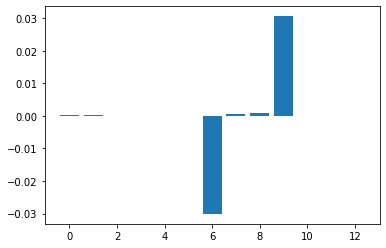

In [ ]:
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(systematic_sample_selectedcols3_x, systematic_sample_selectedcols3_y)
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

dropping unimportant features


In [ ]:
systematic_sample_selectedcols3_x.drop(columns=['DEST_AIRPORT_ID','OP_CARRIER_AIRLINE_ID','CRS_DEP_TIME'],inplace=True)

In [ ]:
systematic_sample_selectedcols3_x.count()


MONTH                   215129
DAY_OF_WEEK             215129
ORIGIN_AIRPORT_ID       215129
OP_CARRIER_FL_NUM       215129
CRS_ELAPSED_TIME        215129
TAXI_OUT                215129
DEP_TIME                215129
WEEK_OF_MONTH           215129
DAY_OF_WEEK_days_end    215129
ORIGIN_DELAY_COUNT      215129
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LOGISTICS = LogisticRegression(class_weight='balanced',solver='saga')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt = make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample3 = cross_val_score(pipeline_LRsmt, systematic_sample_selectedcols3_x, systematic_sample_selectedcols3_y, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_LR_OSample3))

Mean ROC AUC: 0.644


## DecisionTreeClassifier-- feature importance

Feature: 0, Score: 0.03765
Feature: 1, Score: 0.04209
Feature: 2, Score: 0.09237
Feature: 3, Score: 0.17401
Feature: 4, Score: 0.15151
Feature: 5, Score: 0.10018
Feature: 6, Score: 0.25681
Feature: 7, Score: 0.04379
Feature: 8, Score: 0.00378
Feature: 9, Score: 0.09781


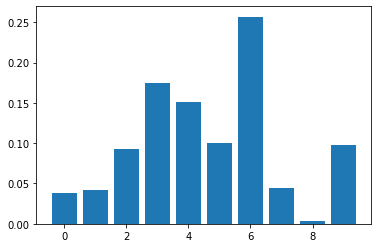

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(class_weight='balanced')
# fit the model
model_DT.fit(systematic_sample_selectedcols3_x, systematic_sample_selectedcols3_y)
# get importance
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_DTsmt = make_pipeline(oversample,pca,model_DT)
kf = StratifiedKFold(n_splits=5)
y_pred_DT_OSample3 = cross_val_score(pipeline_DTsmt, systematic_sample_selectedcols3_x, systematic_sample_selectedcols3_y, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_DT_OSample3))

Mean ROC AUC: 0.500


### Approach 3 accuracy summary
* LR model- 64%
* DT model 50%

# Approach 4

## Instead of origin count- lets try origin airport percentage

In [ ]:
delcountperorigin = systematic_sample_selectedcols[['DEP_DEL15','ORIGIN']].groupby(['ORIGIN']).agg({'DEP_DEL15' : ['count','sum']}).reset_index()
delcountperorigin.columns=['ORIGIN','total_FLIGHTS_ORIGIN','DEP_DELAY_ORIGIN_count']
delcountperorigin['DEP_DELAY_PERCENTAGE_ORIGIN']=(delcountperorigin['DEP_DELAY_ORIGIN_count']/delcountperorigin['total_FLIGHTS_ORIGIN'])*100
#delcountperorigin
systematic_sample_selectedcols4 = systematic_sample_selectedcols.merge(delcountperorigin, left_on='ORIGIN', right_on='ORIGIN')
systematic_sample_selectedcols5=systematic_sample_selectedcols4.copy()
systematic_sample_selectedcols5.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,OP_CARRIER_AIRLINE_ID,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,total_FLIGHTS_ORIGIN,DEP_DELAY_ORIGIN_count,DEP_DELAY_PERCENTAGE_ORIGIN
0,2021,1,17,7,2021-01-17,DFW,11298,11433,N326NB,126.0,1089,986.0,19790,0.0,1153,150.0,28.0,1151.0,3,1,10262,1696.0,16.5
1,2021,1,17,7,2021-01-17,DFW,11298,10397,N329DN,85.0,1244,731.0,19790,0.0,1049,121.0,16.0,1044.0,3,1,10262,1696.0,16.5
2,2021,1,18,1,2021-01-18,DFW,11298,11433,N334NB,128.0,1184,986.0,19790,0.0,1625,151.0,14.0,1619.0,4,0,10262,1696.0,16.5
3,2021,1,18,1,2021-01-18,DFW,11298,11433,N127DU,124.0,1390,986.0,19790,0.0,1400,148.0,13.0,1407.0,4,0,10262,1696.0,16.5
4,2021,1,19,2,2021-01-19,DFW,11298,14869,N356NW,138.0,1038,989.0,19790,0.0,830,177.0,13.0,824.0,4,0,10262,1696.0,16.5


In [ ]:
systematic_sample_selectedcols5.drop(columns=['ORIGIN','DAY_OF_MONTH','DAY_OF_WEEK','total_FLIGHTS_ORIGIN',	'DEP_DELAY_ORIGIN_count','ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'AIR_TIME','YEAR','FL_DATE','TAIL_NUM'],inplace=True)

In [ ]:
systematic_sample_selectedcols5_y= systematic_sample_selectedcols5.DEP_DEL15 
 #Drop target and set the dependent values variables 
systematic_sample_selectedcols5_X = systematic_sample_selectedcols5.drop('DEP_DEL15', axis=1)
print(systematic_sample_selectedcols5_X.shape,systematic_sample_selectedcols5_y.shape)

(215129, 11) (215129,)


### LR-Feature importance

Feature: 0, Score: 0.00246
Feature: 1, Score: -0.00003
Feature: 2, Score: 0.00122
Feature: 3, Score: -0.00016
Feature: 4, Score: -0.03007
Feature: 5, Score: -0.00950
Feature: 6, Score: 0.01019
Feature: 7, Score: 0.03060
Feature: 8, Score: 0.00014
Feature: 9, Score: 0.00059
Feature: 10, Score: 0.01620


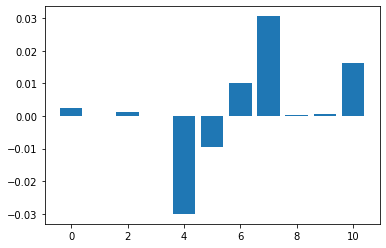

In [ ]:
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(systematic_sample_selectedcols5_X,systematic_sample_selectedcols5_y)
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
systematic_sample_selectedcols5_X.columns

Index(['MONTH', 'OP_CARRIER_FL_NUM', 'DISTANCE', 'OP_CARRIER_AIRLINE_ID',
       'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'TAXI_OUT', 'DEP_TIME',
       'WEEK_OF_MONTH', 'DAY_OF_WEEK_days_end', 'DEP_DELAY_PERCENTAGE_ORIGIN'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LOGISTICS = LogisticRegression(class_weight='balanced',solver='saga')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt = make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample4 = cross_val_score(pipeline_LRsmt, systematic_sample_selectedcols5_X, systematic_sample_selectedcols5_y, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_LR_OSample4))

Mean ROC AUC: 0.623


In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
from numpy import mean
#Rscaler = RobustScaler()
pca = PCA(.95)
oversample = SMOTE()
pipeline_RFsmt = make_pipeline(oversample,pca,model_Randomforest_smt)
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample4 = cross_val_score(pipeline_RFsmt, systematic_sample_selectedcols5_X, systematic_sample_selectedcols5_y, scoring='roc_auc', cv=kf, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(y_pred_RF_OSample4))

Mean ROC AUC: 0.605


### Approach 4 accuracy summary
* LR model- 62%
* RF model - 60%

# APPROACH 5
---



### OP_CARRIER_AIRLINE_ID delay count column and  origin delaypercentage 


In [ ]:
delcountperAirline = systematic_sample_selectedcols[['DEP_DEL15','OP_CARRIER_AIRLINE_ID']].groupby(['OP_CARRIER_AIRLINE_ID']).agg({'DEP_DEL15' : ['count','sum']}).reset_index()
delcountperAirline.columns=['OP_CARRIER_AIRLINE_ID','total_FLIGHTS_perAIRLINE','DEP_DELAY_perAIRLINE']
delcountperAirline['DEP_DELAY_PERCENTAGE_AIRLINE']=(delcountperAirline['DEP_DELAY_perAIRLINE']/delcountperAirline['total_FLIGHTS_perAIRLINE'])
#delcountperAirline
systematic_sample_selectedcols6 = systematic_sample_selectedcols5.merge(delcountperAirline, left_on='OP_CARRIER_AIRLINE_ID', right_on='OP_CARRIER_AIRLINE_ID')
systematic_sample_selectedcols6.drop(columns=['total_FLIGHTS_perAIRLINE', 'DEP_DELAY_perAIRLINE','DISTANCE'],inplace=True)
systematic_sample_selectedcols7=systematic_sample_selectedcols6.copy()

In [ ]:
systematic_sample_selectedcols7.columns

Index(['MONTH', 'OP_CARRIER_FL_NUM', 'OP_CARRIER_AIRLINE_ID', 'DEP_DEL15',
       'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'TAXI_OUT', 'DEP_TIME',
       'WEEK_OF_MONTH', 'DAY_OF_WEEK_days_end', 'DEP_DELAY_PERCENTAGE_ORIGIN',
       'DEP_DELAY_PERCENTAGE_AIRLINE'],
      dtype='object')

In [ ]:
systematic_sample_selectedcols7_y= systematic_sample_selectedcols7.DEP_DEL15 
 #Drop target and set the dependent values variables 
systematic_sample_selectedcols7_X = systematic_sample_selectedcols7.drop('DEP_DEL15', axis=1)
print(systematic_sample_selectedcols7_X.shape,systematic_sample_selectedcols7_y.shape)

(215129, 11) (215129,)


In [ ]:
corr = systematic_sample_selectedcols7_X.corr()
indices = np.where(corr > 0.8)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('CRS_DEP_TIME', 'DEP_TIME')]

In [ ]:
systematic_sample_selectedcols7_X.drop(columns=['DEP_TIME'],axis=1)

,MONTH,OP_CARRIER_FL_NUM,OP_CARRIER_AIRLINE_ID,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,DEP_DELAY_PERCENTAGE_ORIGIN,DEP_DELAY_PERCENTAGE_AIRLINE
0,1,1089,19790,1153,150.0,28.0,3,1,16.5,0.1
1,1,1244,19790,1049,121.0,16.0,3,1,16.5,0.1
2,1,1184,19790,1625,151.0,14.0,4,0,16.5,0.1
3,1,1390,19790,1400,148.0,13.0,4,0,16.5,0.1
4,1,1038,19790,830,177.0,13.0,4,0,16.5,0.1
...,...,...,...,...,...,...,...,...,...,...
215124,1,613,20263,757,29.0,2.0,2,0,0.0,0.1
215125,1,643,20263,1629,29.0,3.0,2,1,0.0,0.1
215126,1,625,20263,957,35.0,3.0,2,0,0.0,0.1
215127,1,655,20263,1829,35.0,4.0,1,1,0.0,0.1


### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LOGISTICS = LogisticRegression(class_weight='balanced',solver='saga')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt = make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample5 = cross_val_score(pipeline_LRsmt, systematic_sample_selectedcols7_X, systematic_sample_selectedcols7_y, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_LR_OSample5))

## Random forest

In [ ]:
#model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
from numpy import mean
#Rscaler = RobustScaler()
pca = PCA(.95)
oversample = SMOTE()
pipeline_RFsmt = make_pipeline(oversample,pca,model_Randomforest_smt)
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample5 = cross_val_score(pipeline_RFsmt,systematic_sample_selectedcols7_X, systematic_sample_selectedcols7_y, scoring='roc_auc', cv=kf, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(y_pred_RF_OSample5))

### Approach 5 accuracy summary
* LR model- 62%
* RF model - 55%

# APPROACH 6 

## Creating New column-> DEP_TIME_BLK as 6 block per day, using CRS_DEP_time with 24 hrs time stamp

In [ ]:
def get_dep_time_blk(dep_time):
    dep_hour = str('%04d' %(dep_time))[:2]
    
    return dep_hour

systematic_sample_selectedcols['DEP_TIMEslot_BLK'] = systematic_sample_selectedcols.DEP_TIME.apply(get_dep_time_blk)
print(systematic_sample_selectedcols[['CRS_DEP_TIME','DEP_TIMEslot_BLK']].head(5))


In [ ]:
systematic_sample_selectedcols[['DEP_TIMEslot_BLK']]=systematic_sample_selectedcols[['DEP_TIMEslot_BLK']].astype(int)

In [ ]:
for dataset in systematic_sample_selectedcols:
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=0, 'Dep_period'] = 'Midnight'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=4,'Dep_period'] ='Early morning'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=7,'Dep_period'] ='Morning'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=12,'Dep_period'] ='Afternoon'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=17,'Dep_period'] ='Evening'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=20,'Dep_period'] ='Night'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] ==24, 'Dep_period'] = 'Midnight'


systematic_sample_selectedcols[['DEP_TIMEslot_BLK','Dep_period']].head()


In [ ]:
delay_timeslotwise_count = systematic_sample_selectedcols[['Dep_period','DEP_DEL15']].groupby(['Dep_period']).sum('DEP_DEL15').sort_values(['DEP_DEL15'],ascending=False).reset_index()
delay_timeslotwise_count

Adding 3 kinds of weightage to categorical columns
1. dep_del count
2. Time slot wise dep delay count
3. Taxi out time Dep delay count

# Column wise weightage 
1. Departure time-  Perodic time slot delay weights 
2. ORIGIN_AIRPORT_ID - Perodic time slot delay weights
3. OP_carrier airline- Perodic time slot delay weights
4. Origin- Perodic time slot delay weights
5. Tail number-Delay weight
6. Days of Week - Delay weight
  * Including Week_days-0 and Week_ends-1 column
7. Days of month - Delay weight
8. Month- Delay weight
9. OP_CARRIER_FL_NUM - Taxi out delay weights

### 1. DEP_TIMEslot_BLK on delay percentage Probablity and weightage

In [ ]:
periodcountperdeptime = systematic_sample_selectedcols[['DEP_TIMEslot_BLK','Dep_period']].groupby(['DEP_TIMEslot_BLK','Dep_period']).count().reset_index()
periodcountperdeptime.head()

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
periodcountperdeptime = systematic_sample_selectedcols.groupby(['Dep_period','DEP_TIMEslot_BLK']).agg({'Dep_period' : ['count'],'DEP_DEL15' : ['sum']}).reset_index()
periodcountperdeptime.columns=['Dep_period','DEP_TIMEslot_BLK','DEP_TIME_timeslot_tot_count','DEP_TIME_timeslotwise_DELAY_COUNT']
periodcountperdeptime.sort_values(['DEP_TIME_timeslotwise_DELAY_COUNT'],ascending=False)
percentage_DEP_TIMEslot= (periodcountperdeptime['DEP_TIME_timeslotwise_DELAY_COUNT']/periodcountperdeptime['DEP_TIME_timeslot_tot_count'])*100
periodcountperdeptime['percentage_DEP_TIMEslot_del']=percentage_DEP_TIMEslot
periodcountperdeptime.sort_values(by='percentage_DEP_TIMEslot_del',ascending=False)
periodcountperdeptime['DEP_TIME_timeslot_weight'] = pd.qcut(periodcountperdeptime['percentage_DEP_TIMEslot_del'], 24, labels = False,duplicates='drop')
periodcountperdeptime.sort_values(by='DEP_TIME_timeslot_weight',ascending=False)
print(periodcountperdeptime)
systematic_sample_selectedcols0 = systematic_sample_selectedcols.merge(periodcountperdeptime, left_on=['DEP_TIMEslot_BLK','Dep_period'], right_on=['DEP_TIMEslot_BLK','Dep_period'])
systematic_sample_selectedcols0.drop(columns=['percentage_DEP_TIMEslot_del','DEP_TIME_timeslotwise_DELAY_COUNT','DEP_TIME_timeslot_tot_count','DEP_TIMEslot_BLK'], inplace=True, axis=1)
systematic_sample_selectedcols0.head(3)

### 2. ORIGIN - Perodic time slot delay weights

In [ ]:
periodcountperairport = systematic_sample_selectedcols[['ORIGIN','Dep_period']].groupby(['ORIGIN','Dep_period']).count().reset_index()
periodcountperairport.head(4)

,ORIGIN,Dep_period
0,ABE,Afternoon
1,ABE,Early morning
2,ABE,Evening
3,ABE,Morning


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
periodcountperorg = systematic_sample_selectedcols.groupby(['Dep_period','ORIGIN']).agg({'Dep_period' : ['count'],'DEP_DEL15' : ['sum']}).reset_index()
periodcountperorg.columns=['Dep_period','ORIGIN','ORIGIN_timeslot_tot_count','ORIGIN_timeslotwise_DELAY_COUNT']
periodcountperorg.sort_values(['ORIGIN_timeslotwise_DELAY_COUNT'],ascending=False)
percentage1= (periodcountperorg['ORIGIN_timeslotwise_DELAY_COUNT']/periodcountperorg['ORIGIN_timeslot_tot_count'])*100
periodcountperorg['percentage_Delay_org']=percentage1
periodcountperorg.sort_values(by='percentage_Delay_org',ascending=False)
periodcountperorg['ORIGIN_timeslot_weight'] = pd.qcut(periodcountperorg['percentage_Delay_org'], 200, labels = False,duplicates='drop')
periodcountperorg.head()
systematic_sample_selectedcols_1 = systematic_sample_selectedcols0.merge(periodcountperorg, left_on=['ORIGIN','Dep_period'], right_on=['ORIGIN','Dep_period'])
systematic_sample_selectedcols_1.drop(columns=['ORIGIN','percentage_Delay_org','ORIGIN_timeslot_tot_count','ORIGIN_timeslotwise_DELAY_COUNT'], inplace=True, axis=1)
systematic_sample_selectedcols_1.head(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,OP_CARRIER_AIRLINE_ID,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight
0,2021,1,17,7,2021-01-17,11298,11433,N326NB,126.0,1089,986.0,19790,0.0,1153,150.0,28.0,1151.0,3,1,Morning,7,57
1,2021,1,24,7,2021-01-24,11298,13931,N227NN,140.0,3326,1212.0,20398,1.0,1045,181.0,12.0,1153.0,4,1,Morning,7,57
2,2021,1,5,2,2021-01-05,11298,15016,N285NN,80.0,3352,550.0,20398,1.0,1019,109.0,12.0,1130.0,2,0,Morning,7,57


### 3. OP_carrier airline- Perodic time slot delay weights

In [ ]:
periodcountperairLine = systematic_sample_selectedcols[['OP_CARRIER_AIRLINE_ID','Dep_period']].groupby(['OP_CARRIER_AIRLINE_ID','Dep_period']).count().reset_index()
periodcountperairLine.head(5)

,OP_CARRIER_AIRLINE_ID,Dep_period
0,19393,Afternoon
1,19393,Early morning
2,19393,Evening
3,19393,Midnight
4,19393,Morning


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
periodcountperairLine = systematic_sample_selectedcols.groupby(['Dep_period','OP_CARRIER_AIRLINE_ID']).agg({'Dep_period' : ['count'],'DEP_DEL15' : ['sum']}).reset_index()
periodcountperairLine.columns=['Dep_period','OP_CARRIER_AIRLINE_ID','OP_CARRIER_timeslot_TOTcount','OP_CARRIER_timeslotwise_DELAY_COUNT']
periodcountperairLine.sort_values(['OP_CARRIER_timeslotwise_DELAY_COUNT'],ascending=False)
percentage1= (periodcountperairLine['OP_CARRIER_timeslotwise_DELAY_COUNT']/periodcountperairLine['OP_CARRIER_timeslot_TOTcount'])*100
periodcountperairLine['percentage_Delay1']=percentage1
periodcountperairLine.sort_values(by='percentage_Delay1',ascending=False)
periodcountperairLine['OP_CARRIER_airline_timeslot_weight'] = pd.qcut(periodcountperairLine['percentage_Delay1'], 200, labels = False,duplicates='drop')
systematic_sample_selectedcols_2 = systematic_sample_selectedcols_1.merge(periodcountperairLine, left_on=['OP_CARRIER_AIRLINE_ID','Dep_period'], right_on=['OP_CARRIER_AIRLINE_ID','Dep_period'])
systematic_sample_selectedcols_2.drop(columns=['OP_CARRIER_AIRLINE_ID','percentage_Delay1','OP_CARRIER_timeslotwise_DELAY_COUNT','OP_CARRIER_timeslot_TOTcount'], inplace=True, axis=1)
systematic_sample_selectedcols_2.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight,OP_CARRIER_airline_timeslot_weight
0,2021,1,17,7,2021-01-17,11298,11433,N326NB,126.0,1089,986.0,0.0,1153,150.0,28.0,1151.0,3,1,Morning,7,57,42
1,2021,2,24,3,2021-02-24,11298,10397,N305DN,91.0,1244,731.0,1.0,1049,121.0,22.0,1115.0,5,0,Morning,7,57,42
2,2021,2,9,2,2021-02-09,11298,11433,N353NB,118.0,1089,986.0,0.0,1155,150.0,10.0,1147.0,3,0,Morning,7,57,42
3,2021,2,27,6,2021-02-27,11298,11433,N368NB,112.0,1089,986.0,0.0,1155,150.0,21.0,1159.0,5,1,Morning,7,57,42
4,2021,2,13,6,2021-02-13,11298,10397,N329DN,92.0,1244,731.0,1.0,1049,121.0,21.0,1157.0,3,1,Morning,7,57,42


### 5. Tail number-Delay weight

In [ ]:
tail_dep_del = systematic_sample_selectedcols[['TAIL_NUM','DEP_DEL15']].groupby('TAIL_NUM').sum().sort_values(by='DEP_DEL15',ascending=False).reset_index()
tail_dep_del.rename({'DEP_DEL15':'TAIL_NUM_DELAY_COUNT'},inplace=True, axis=1)
tail_dep_del['TAIL_DELAY_weight'] = pd.qcut(tail_dep_del['TAIL_NUM_DELAY_COUNT'], 60, labels = False,duplicates='drop')
print(tail_dep_del)
systematic_sample_selectedcols_3 = systematic_sample_selectedcols_2.merge(tail_dep_del, left_on='TAIL_NUM', right_on='TAIL_NUM')
systematic_sample_selectedcols_3.drop(columns=['TAIL_NUM','TAIL_NUM_DELAY_COUNT'], inplace=True, axis=1)
systematic_sample_selectedcols_3.head()

     TAIL_NUM  TAIL_NUM_DELAY_COUNT  TAIL_DELAY_weight
0      N957LR                  20.0                 12
1      N952LR                  19.0                 12
2      N425LV                  18.0                 12
3      N430WN                  18.0                 12
4      N7737E                  18.0                 12
...       ...                   ...                ...
5359   N39726                   0.0                  0
5360   N396HA                   0.0                  0
5361   N396DA                   0.0                  0
5362   N14735                   0.0                  0
5363   N773UA                   0.0                  0

[5364 rows x 3 columns]


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight,OP_CARRIER_airline_timeslot_weight,TAIL_DELAY_weight
0,2021,1,17,7,2021-01-17,11298,11433,126.0,1089,986.0,0.0,1153,150.0,28.0,1151.0,3,1,Morning,7,57,42,3
1,2021,4,30,5,2021-04-30,11298,13487,118.0,2025,852.0,0.0,905,146.0,14.0,857.0,5,0,Morning,3,57,42,3
2,2021,1,18,1,2021-01-18,10397,11624,94.0,2233,646.0,0.0,940,110.0,11.0,934.0,4,0,Morning,5,36,42,3
3,2021,5,26,3,2021-05-26,14869,11648,81.0,2126,531.0,0.0,1159,98.0,13.0,1152.0,5,0,Morning,7,34,42,3
4,2021,4,6,2,2021-04-06,14869,11884,80.0,2405,546.0,0.0,815,105.0,22.0,810.0,2,0,Morning,3,34,42,3


## Including Week_days and Week_ends column 

In [ ]:
#'DAY_OF_WEEK' because delay could depend on traffic in specific days: classify it to weekend or working day
def get_day_category(day_of_week):
    if day_of_week <= 5:
        return 0 #'working day'
    elif day_of_week > 5:
        return 1 #'weekend'
systematic_sample_selectedcols_3['DAY_OF_WEEK_day_end'] = systematic_sample_selectedcols_3['DAY_OF_WEEK']
   
systematic_sample_selectedcols_3.DAY_OF_WEEK_day_end = systematic_sample_selectedcols_3.DAY_OF_WEEK_day_end.apply(get_day_category)
systematic_sample_selectedcols_3.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight,OP_CARRIER_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end
0,2021,1,17,7,2021-01-17,11298,11433,126.0,1089,986.0,0.0,1153,150.0,28.0,1151.0,3,1,Morning,7,57,42,3,1
1,2021,4,30,5,2021-04-30,11298,13487,118.0,2025,852.0,0.0,905,146.0,14.0,857.0,5,0,Morning,3,57,42,3,0
2,2021,1,18,1,2021-01-18,10397,11624,94.0,2233,646.0,0.0,940,110.0,11.0,934.0,4,0,Morning,5,36,42,3,0
3,2021,5,26,3,2021-05-26,14869,11648,81.0,2126,531.0,0.0,1159,98.0,13.0,1152.0,5,0,Morning,7,34,42,3,0
4,2021,4,6,2,2021-04-06,14869,11884,80.0,2405,546.0,0.0,815,105.0,22.0,810.0,2,0,Morning,3,34,42,3,0


## 6. Days of Week - Delay weight


In [ ]:
cols=['DAY_OF_WEEK','TOTALFLIGHT_WEEKDAY','DEPDELAY_WEEKDAY','WEEK_DEP_DELAY_PERCENTAGE']
lst = []
for week in range(1,8):
  WEEK=week
  weekflighttot=systematic_sample_selectedcols['DAY_OF_WEEK'][systematic_sample_selectedcols.DAY_OF_WEEK==week].count()
  week_all=systematic_sample_selectedcols[systematic_sample_selectedcols['DAY_OF_WEEK']==week]
  weekdepdel=week_all['DEP_DEL15'][week_all['DEP_DEL15']==1].sum()
  percentweekdepdel=(weekdepdel/weekflighttot)*100
  lst.append([WEEK,weekflighttot,weekdepdel,percentweekdepdel])
WEEKWISE_DEP_DELAY_TABLE = pd.DataFrame(lst, columns=cols)
WEEKWISE_DEP_DELAY_TABLE['WEEK_DELAY_weight'] = pd.qcut(WEEKWISE_DEP_DELAY_TABLE['WEEK_DEP_DELAY_PERCENTAGE'], 7 , labels = False,duplicates='drop')
print(WEEKWISE_DEP_DELAY_TABLE)
systematic_sample_selectedcols_4 = systematic_sample_selectedcols_3.merge(WEEKWISE_DEP_DELAY_TABLE, left_on='DAY_OF_WEEK', right_on='DAY_OF_WEEK')
systematic_sample_selectedcols_4.drop(columns=['TOTALFLIGHT_WEEKDAY'	,'DEPDELAY_WEEKDAY',	'WEEK_DEP_DELAY_PERCENTAGE','DAY_OF_WEEK'], inplace=True, axis=1)
systematic_sample_selectedcols_4.head(4)

   DAY_OF_WEEK  ...  WEEK_DELAY_weight
0            1  ...                  5
1            2  ...                  1
2            3  ...                  0
3            4  ...                  2
4            5  ...                  3
5            6  ...                  4
6            7  ...                  6

[7 rows x 5 columns]


,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight,OP_CARRIER_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight
0,2021,1,17,2021-01-17,11298,11433,126.0,1089,986.0,0.0,1153,150.0,28.0,1151.0,3,1,Morning,7,57,42,3,1,6
1,2021,2,28,2021-02-28,10721,13487,200.0,963,1124.0,0.0,720,205.0,13.0,715.0,5,1,Morning,2,27,42,3,1,6
2,2021,5,9,2021-05-09,14869,12954,87.0,833,588.0,1.0,1133,115.0,10.0,1313.0,2,1,Afternoon,8,77,64,3,1,6
3,2021,1,31,2021-01-31,14107,14747,161.0,1547,1107.0,0.0,1615,193.0,25.0,1608.0,5,1,Afternoon,11,77,64,3,1,6


## 7. Day of month-Delay weight

In [ ]:
cols=['DAY_OF_MONTH','TOTAL_FLIGHTS','DAY_OF_MONTH_DELAYED_FLIGHTS','%DAYMONTH_DEP_DELAYED']
lst = []
for daymonth in range(1,32):
  MONTHday=daymonth
  monthdayflighttot=systematic_sample_selectedcols['DAY_OF_MONTH'][systematic_sample_selectedcols.DAY_OF_MONTH==daymonth].count()
  monthday_all=systematic_sample_selectedcols[systematic_sample_selectedcols['DAY_OF_MONTH']==daymonth]
  monthdaydepdel=monthday_all['DEP_DEL15'][monthday_all['DEP_DEL15']==1].sum()
  percentmonthdaydepdel=(monthdaydepdel/monthdayflighttot)*100
  lst.append([MONTHday,monthdayflighttot,monthdaydepdel,percentmonthdaydepdel])
MONTHDAYWISE_DEP_DELAY_TABLE = pd.DataFrame(lst, columns=cols)
MONTHDAYWISE_DEP_DELAY_TABLE['DAY_OF_MONTH_DELAY_weight'] = pd.qcut(MONTHDAYWISE_DEP_DELAY_TABLE['%DAYMONTH_DEP_DELAYED'], 31 , labels = False,duplicates='drop')
print(MONTHDAYWISE_DEP_DELAY_TABLE.head(3))
systematic_sample_selectedcols_5 = systematic_sample_selectedcols_4.merge(MONTHDAYWISE_DEP_DELAY_TABLE, left_on='DAY_OF_MONTH', right_on='DAY_OF_MONTH')
systematic_sample_selectedcols_5.drop(columns=['TOTAL_FLIGHTS','DAY_OF_MONTH_DELAYED_FLIGHTS','%DAYMONTH_DEP_DELAYED','DAY_OF_MONTH'], inplace=True, axis=1)
systematic_sample_selectedcols_5.head()

   DAY_OF_MONTH  ...  DAY_OF_MONTH_DELAY_weight
0             1  ...                         22
1             2  ...                         10
2             3  ...                         26

[3 rows x 5 columns]


,YEAR,MONTH,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight,OP_CARRIER_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight,DAY_OF_MONTH_DELAY_weight
0,2021,1,2021-01-17,11298,11433,126.0,1089,986.0,0.0,1153,150.0,28.0,1151.0,3,1,Morning,7,57,42,3,1,6,23
1,2021,1,2021-01-17,11298,10397,85.0,1244,731.0,0.0,1049,121.0,16.0,1044.0,3,1,Morning,4,57,42,3,1,6,23
2,2021,1,2021-01-17,14679,11433,254.0,799,1956.0,0.0,720,256.0,12.0,704.0,3,1,Morning,2,28,42,4,1,6,23
3,2021,1,2021-01-17,13930,14869,181.0,1305,1250.0,0.0,1700,215.0,32.0,1657.0,3,1,Afternoon,11,47,64,2,1,6,23
4,2021,1,2021-01-17,14869,14771,99.0,1263,599.0,0.0,2105,123.0,11.0,2058.0,3,1,Night,14,30,118,2,1,6,23


## 8. Month - Delay Weight

In [ ]:
cols=['MONTH','TOTAL_FLIGHTS','MONTH_DELAYED_FLIGHTS','%_DEP_DELAYED']
lst = []
for monthvar in range(1,6):
  MONTH=monthvar
  monthflighttot=systematic_sample_selectedcols['MONTH'][systematic_sample_selectedcols.MONTH==monthvar].count()
  month_all=systematic_sample_selectedcols[systematic_sample_selectedcols['MONTH']==monthvar]
  monthdepdel=month_all['DEP_DEL15'][month_all['DEP_DEL15']==1].sum()
  percentmonthdepdel=(monthdepdel/monthflighttot)*100
  lst.append([MONTH,monthflighttot,monthdepdel,percentmonthdepdel])
MONTHWISE_DEP_DELAY_TABLE = pd.DataFrame(lst, columns=cols)
MONTHWISE_DEP_DELAY_TABLE['MONTH_DELAY_weight'] = pd.qcut(MONTHWISE_DEP_DELAY_TABLE['%_DEP_DELAYED'], 5, labels = False)
print(MONTHWISE_DEP_DELAY_TABLE)
systematic_sample_selectedcols_6 = systematic_sample_selectedcols_5.merge(MONTHWISE_DEP_DELAY_TABLE, left_on='MONTH', right_on='MONTH')
systematic_sample_selectedcols_6.drop(columns=['TOTAL_FLIGHTS','MONTH_DELAYED_FLIGHTS','%_DEP_DELAYED','MONTH'], inplace=True, axis=1)
systematic_sample_selectedcols_6.head()

   MONTH  TOTAL_FLIGHTS  ...  %_DEP_DELAYED  MONTH_DELAY_weight
0      1          37473  ...            8.5                   0
1      2          32931  ...           11.6                   3
2      3          46034  ...           10.1                   1
3      4          47059  ...           10.6                   2
4      5          51632  ...           13.6                   4

[5 rows x 5 columns]


,YEAR,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIR_TIME,OP_CARRIER_FL_NUM,DISTANCE,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,TAXI_OUT,DEP_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight,OP_CARRIER_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight,DAY_OF_MONTH_DELAY_weight,MONTH_DELAY_weight
0,2021,2021-01-17,11298,11433,126.0,1089,986.0,0.0,1153,150.0,28.0,1151.0,3,1,Morning,7,57,42,3,1,6,23,0
1,2021,2021-01-17,11298,10397,85.0,1244,731.0,0.0,1049,121.0,16.0,1044.0,3,1,Morning,4,57,42,3,1,6,23,0
2,2021,2021-01-17,14679,11433,254.0,799,1956.0,0.0,720,256.0,12.0,704.0,3,1,Morning,2,28,42,4,1,6,23,0
3,2021,2021-01-17,13930,14869,181.0,1305,1250.0,0.0,1700,215.0,32.0,1657.0,3,1,Afternoon,11,47,64,2,1,6,23,0
4,2021,2021-01-17,14869,14771,99.0,1263,599.0,0.0,2105,123.0,11.0,2058.0,3,1,Night,14,30,118,2,1,6,23,0


## 8. OP_CARRIER_FL_NUM -  Taxi out delay weights

In [ ]:
taxioutmean = systematic_sample_selectedcols[['OP_CARRIER_FL_NUM','TAXI_OUT']].groupby(['OP_CARRIER_FL_NUM']).mean(['TAXI_OUT']).sort_values(by='TAXI_OUT',ascending=False).reset_index()
taxioutmean.rename({'TAXI_OUT':'TAXI_OUT_mean'},inplace=True, axis=1)
taxioutmean['FL_NUM_Taxiout_weight'] = pd.qcut(taxioutmean['TAXI_OUT_mean'], 200, labels = False,duplicates='drop')
print(taxioutmean)
systematic_sample_selectedcols_7 = systematic_sample_selectedcols_6.merge(taxioutmean, left_on='OP_CARRIER_FL_NUM', right_on='OP_CARRIER_FL_NUM')
systematic_sample_selectedcols_7.drop(columns=['TAXI_OUT','TAXI_OUT_mean','OP_CARRIER_FL_NUM','DEP_TIME'], inplace=True, axis=1)
systematic_sample_selectedcols_7.head(3)

      OP_CARRIER_FL_NUM  TAXI_OUT_mean  FL_NUM_Taxiout_weight
0                  9645           74.0                    198
1                  7411           60.0                    198
2                  6822           54.0                    198
3                  7026           48.0                    198
4                  6379           47.0                    198
...                 ...            ...                    ...
6446               6961            6.0                      0
6447               6926            6.0                      0
6448               6666            6.0                      0
6449               6603            6.0                      0
6450               6947            5.0                      0

[6451 rows x 3 columns]


,YEAR,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIR_TIME,DISTANCE,DEP_DEL15,CRS_DEP_TIME,CRS_ELAPSED_TIME,WEEK_OF_MONTH,DAY_OF_WEEK_days_end,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_timeslot_weight,OP_CARRIER_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight,DAY_OF_MONTH_DELAY_weight,MONTH_DELAY_weight,FL_NUM_Taxiout_weight
0,2021,2021-01-17,11298,11433,126.0,986.0,0.0,1153,150.0,3,1,Morning,7,57,42,3,1,6,23,0,63
1,2021,2021-01-05,11697,13232,164.0,1167.0,0.0,1925,195.0,2,0,Evening,15,94,151,9,0,1,0,0,63
2,2021,2021-05-31,11298,14869,169.0,989.0,0.0,815,177.0,6,0,Morning,3,57,42,8,0,5,24,4,63


In [ ]:
systematic_sample_selectedcols8 = systematic_sample_selectedcols_7.drop(columns=['YEAR','FL_DATE'],axis=1)

In [ ]:
systematic_sample_selectedcols8[['DEP_DEL15']]=systematic_sample_selectedcols8[['DEP_DEL15']].astype(int)

In [ ]:
systematic_sample_selectedcols8 = systematic_sample_selectedcols8.astype({col: 'float16' for col in systematic_sample_selectedcols8.select_dtypes('float64').columns})
systematic_sample_selectedcols8 = systematic_sample_selectedcols8.astype({col: 'int16' for col in systematic_sample_selectedcols8.select_dtypes('int64').columns})

In [ ]:
systematic_sample_selectedcols8.dtypes

ORIGIN_AIRPORT_ID                       int16
DEST_AIRPORT_ID                         int16
AIR_TIME                              float16
DISTANCE                              float16
DEP_DEL15                               int16
CRS_DEP_TIME                            int16
CRS_ELAPSED_TIME                      float16
WEEK_OF_MONTH                           int16
DAY_OF_WEEK_days_end                    int16
Dep_period                             object
DEP_TIME_timeslot_weight                int16
ORIGIN_timeslot_weight                  int16
OP_CARRIER_airline_timeslot_weight      int16
TAIL_DELAY_weight                       int16
DAY_OF_WEEK_day_end                     int16
WEEK_DELAY_weight                       int16
DAY_OF_MONTH_DELAY_weight               int16
MONTH_DELAY_weight                      int16
FL_NUM_Taxiout_weight                   int16
dtype: object

### CORRELATION among features

In [ ]:
corr = systematic_sample_selectedcols8.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.8)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('AIR_TIME', 'DISTANCE'),
 ('AIR_TIME', 'CRS_ELAPSED_TIME'),
 ('DISTANCE', 'CRS_ELAPSED_TIME'),
 ('CRS_DEP_TIME', 'DEP_TIME_timeslot_weight'),
 ('DAY_OF_WEEK_days_end', 'DAY_OF_WEEK_day_end')]

In [ ]:
systematic_samplefinal=systematic_sample_selectedcols8.copy()

In [ ]:
systematic_samplefinal = pd.get_dummies(systematic_samplefinal, drop_first=True)
systematic_samplefinal.columns

Index(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'AIR_TIME', 'DISTANCE',
       'DEP_DEL15', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'WEEK_OF_MONTH',
       'DAY_OF_WEEK_days_end', 'DEP_TIME_timeslot_weight',
       'ORIGIN_timeslot_weight', 'OP_CARRIER_airline_timeslot_weight',
       'TAIL_DELAY_weight', 'DAY_OF_WEEK_day_end', 'WEEK_DELAY_weight',
       'DAY_OF_MONTH_DELAY_weight', 'MONTH_DELAY_weight',
       'FL_NUM_Taxiout_weight', 'Dep_period_Early morning',
       'Dep_period_Evening', 'Dep_period_Midnight', 'Dep_period_Morning',
       'Dep_period_Night'],
      dtype='object')

In [ ]:
y = systematic_samplefinal.DEP_DEL15 
 #Drop target and set the dependent values variables 
X = systematic_samplefinal.drop('DEP_DEL15', axis=1)
print(X.shape,y.shape)

(215129, 22) (215129,)


In [ ]:
#eliminating highly correlated columns
#X_new8=X.drop(columns=['AIR_TIME','DISTANCE','ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID','CRS_DEP_TIME','Dep_period_Early morning', 'Dep_period_Evening', 'Dep_period_Midnight',
#       'Dep_period_Morning', 'Dep_period_Night'],axis=1)

In [ ]:
#X_new8=X.drop(columns=['Dep_period_Early morning', 'Dep_period_Evening', 'Dep_period_Midnight',
#       'Dep_period_Morning', 'Dep_period_Night'],axis=1)

In [ ]:
#X_new8.columns

In [ ]:
from sklearn.linear_model import LogisticRegression
from numpy import mean
model_LOGISTICS = LogisticRegression(class_weight='balanced',solver='saga')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt = make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample8 = cross_val_score(pipeline_LRsmt,X,y, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_LR_OSample8))

Mean ROC AUC: 0.535


In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
oversample = SMOTE()
pipeline_RFsmt = make_pipeline(oversample,model_Randomforest_smt)
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample8 = cross_val_score(pipeline_RFsmt,X,y, scoring='roc_auc', cv=kf, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(y_pred_RF_OSample8))

Mean ROC AUC: 0.883


In [ ]:
y_pred_RF_OSample8_1 = cross_val_predict(pipeline_RFsmt,X, y, cv=kf)
print(confusion_matrix(y, y_pred_RF_OSample8_1))
print(classification_report(y, y_pred_RF_OSample8_1))

[[190515    935]
 [ 16378   7301]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    191450
           1       0.89      0.31      0.46     23679

    accuracy                           0.92    215129
   macro avg       0.90      0.65      0.71    215129
weighted avg       0.92      0.92      0.90    215129



### Approach 6- Accuracy summary
* Logistic regression- 53%
* Random forest - 88%

In [ ]:
#selected_columns_Approach7=pd.concat(periodcountperdeptime['percentage_DEP_TIMEslot_del'],periodcountperorg['percentage_Delay_org'],periodcountperairLine['percentage_Delay1'],tail_dep_del['TAIL_NUM_DELAY_COUNT'],systematic_sample_selectedcols_3['DAY_OF_WEEK_day_end'],WEEKWISE_DEP_DELAY_TABLE['WEEK_DEP_DELAY_PERCENTAGE'],MONTHDAYWISE_DEP_DELAY_TABLE['%DAYMONTH_DEP_DELAYED'],MONTHWISE_DEP_DELAY_TABLE['%_DEP_DELAYED'],taxioutmean['TAXI_OUT_mean'], axis =1)

In [ ]:
#selected_columns_Approach7=pd.concat(periodcountperdeptime.percentage_DEP_TIMEslot_del,periodcountperorg.percentage_Delay_org , axis=1)

In [ ]:
'''from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_Train_scaled_new)
    wcss.append(kmeans.inertia_)'''

In [ ]:
'''plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()'''

In [ ]:
'''kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X_Test_scaled_new)'''

In [ ]:
#y_kmeans

In [ ]:
'''print(confusion_matrix(Y_Test_new, y_kmeans))
print(classification_report(Y_Test_new, y_kmeans))'''